In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
%matplotlib inline

In [23]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
X_train, y_train = train_data.drop('class of diagnosis', axis=1), train_data['class of diagnosis']
X_test, y_test = test_data.drop('class of diagnosis', axis=1), test_data['class of diagnosis']
X_test.head()

,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,type of MM_0,...,blood lactic dehydrogenise (LDH),alkaline phosphatise (ALP),total protein,albumin,glucose,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,C-reactive protein (CRP)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,453.0,61.0,5.5,2.7,100.0,323.0,4.90,2.60,23.0,76.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,237.0,111.0,6.2,3.6,79.0,211.0,0.00,0.00,91.0,43.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,133.0,63.0,7.5,2.8,149.0,222.0,3.17,1.77,37.0,67.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,127.0,53.0,6.3,4.2,105.0,854.0,6.20,4.40,15.0,67.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,347.0,63.0,7.7,3.0,94.0,164.0,0.00,0.00,91.0,43.0


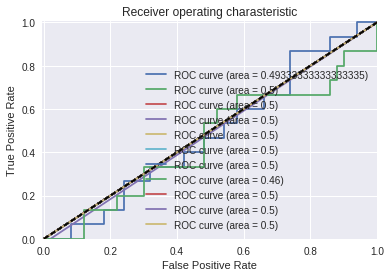

In [42]:
AOC = []
param =[]
lista = []
for i in range(10):
    ile = np.random.randint(5)
    k = []
    for i in range(ile):
        k.append(np.random.randint(300))
    k.append(2)
    lista.append(tuple(k))

lista.append((69, 395, 2))
for el in lista:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=el, random_state=1)
    clf.fit(X_train, y_train)    

    #print("Neural net accuracy = {}".format(accuracy_score(y_test, clf.predict(X_test))))

    #print("NN AUC = {}".format(nn_roc_auc))
    #print(classification_report(y_test, clf.predict(X_test)))
    nn_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

    plt.plot(fpr, tpr, label="ROC curve (area = {})".format(nn_roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.005])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charasteristic")
    plt.legend(loc="lower right")
    AOC.append(nn_roc_auc)
    param.append(el)